In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv('Std_Trainable_data.csv')
df.head()

,Unnamed: 0,zip,number_of_properties,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,...,office_employment_pct_chg,industrial_employment,industrial_employment_pct_chg,households,households_pct_chg,population,population_pct_chg,household_avg_income,household_avg_income_pct_chg,Liking
0,7,77072.0,-0.03753,0,1,-1.487651,0,-0.687108,0.960546,-0.104365,...,1.988227,-1.587119,1.206230,-1.379162,0.254581,-1.446952,1.321702,-1.383081,0.744533,0.0
1,8,77072.0,-0.03753,0,1,-1.398322,0,-0.687108,1.028919,0.333717,...,-0.275032,-1.708630,-0.550005,-1.306559,0.485320,-1.361026,1.093014,-1.330591,0.097344,0.0
2,9,77072.0,-0.03753,0,1,-1.308993,0,-0.687108,0.584491,-0.980528,...,-0.366841,-1.710249,-0.195991,-1.244829,-0.084542,-1.285036,0.536502,-1.257979,0.432308,0.0
3,10,77072.0,-0.03753,0,1,-1.219665,0,-0.687108,0.037501,-1.243377,...,0.194720,-1.611361,0.105333,-1.184047,-0.182073,-1.220997,-0.069859,-1.234619,-0.515832,0.0
4,11,77072.0,-0.03753,0,1,-1.130336,0,-0.687108,-0.406927,-0.980528,...,0.170681,-1.369376,0.525651,-1.144989,-1.173532,-1.161858,-0.336146,-1.170502,0.188016,0.0


In [3]:
df = df.drop(['Unnamed: 0','zip'],axis=1)
df.head()

,number_of_properties,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,asking_rent_pct_chg,abs_per_occ_stk_pct,...,office_employment_pct_chg,industrial_employment,industrial_employment_pct_chg,households,households_pct_chg,population,population_pct_chg,household_avg_income,household_avg_income_pct_chg,Liking
0,-0.03753,0,1,-1.487651,0,-0.687108,0.960546,-0.104365,0.012139,-0.197553,...,1.988227,-1.587119,1.206230,-1.379162,0.254581,-1.446952,1.321702,-1.383081,0.744533,0.0
1,-0.03753,0,1,-1.398322,0,-0.687108,1.028919,0.333717,0.436848,-0.718453,...,-0.275032,-1.708630,-0.550005,-1.306559,0.485320,-1.361026,1.093014,-1.330591,0.097344,0.0
2,-0.03753,0,1,-1.308993,0,-0.687108,0.584491,-0.980528,0.153709,-0.279800,...,-0.366841,-1.710249,-0.195991,-1.244829,-0.084542,-1.285036,0.536502,-1.257979,0.432308,0.0
3,-0.03753,0,1,-1.219665,0,-0.687108,0.037501,-1.243377,-0.483354,-0.197553,...,0.194720,-1.611361,0.105333,-1.184047,-0.182073,-1.220997,-0.069859,-1.234619,-0.515832,0.0
4,-0.03753,0,1,-1.130336,0,-0.687108,-0.406927,-0.980528,-0.164823,-0.279800,...,0.170681,-1.369376,0.525651,-1.144989,-1.173532,-1.161858,-0.336146,-1.170502,0.188016,0.0


In [4]:
data = df.drop('Liking',axis=1)
target = df['Liking']

In [5]:
df.Liking.value_counts()

1.0    2665
0.0     615
Name: Liking, dtype: int64

## UnderSampling

In [6]:
# Divide by class
df_class_0 = df[df['Liking'] == 0]
df_class_1 = df[df['Liking'] == 1]

In [7]:
# Undersample 0-class and concat the DataFrames of both class
df_class_1_under = df_class_1.sample(len(df_class_0))
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print('Random under-sampling:')
print(df_test_under.Liking.value_counts())

Random under-sampling:
0.0    615
1.0    615
Name: Liking, dtype: int64


In [8]:
X = df_test_under.drop('Liking',axis = 1)
y = df_test_under['Liking']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [10]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [11]:
model.score(X_test,y_test)

0.6937669376693767

<AxesSubplot:>

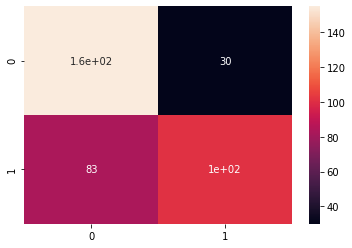

In [12]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.84      0.73       185
         1.0       0.77      0.55      0.64       184

    accuracy                           0.69       369
   macro avg       0.71      0.69      0.69       369
weighted avg       0.71      0.69      0.69       369



## Over Sampling

In [14]:
df_class_0_over = df_class_0.sample(len(df_class_1), replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)
print('Random over-sampling:')
print(df_test_over.Liking.value_counts())

Random over-sampling:
0.0    2665
1.0    2665
Name: Liking, dtype: int64


In [15]:
df_test_over.head()

,number_of_properties,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,asking_rent_pct_chg,abs_per_occ_stk_pct,...,office_employment_pct_chg,industrial_employment,industrial_employment_pct_chg,households,households_pct_chg,population,population_pct_chg,household_avg_income,household_avg_income_pct_chg,Liking
615,-0.401661,4,2,1.192212,0,-0.687108,-0.612048,-0.104365,-3.456314,-0.691037,...,-2.079292,0.385269,-2.339330,1.247443,-0.652504,1.245227,-0.932650,0.972168,-0.620318,1.0
616,-0.401661,4,1,-1.487651,0,-0.687108,0.071688,-0.104365,0.012139,-0.197553,...,1.988227,-1.587119,1.206230,-1.379162,0.254581,-1.446952,1.321702,-1.383081,0.744533,1.0
617,-0.401661,4,1,-1.398322,0,-0.605291,0.105875,0.246100,0.684594,0.049190,...,-0.275032,-1.708630,-0.550005,-1.306559,0.485320,-1.361026,1.093014,-1.330591,0.097344,1.0
618,-0.401661,4,1,-1.308993,0,-0.619301,-0.235993,-0.717679,-0.200215,0.241100,...,-0.366841,-1.710249,-0.195991,-1.244829,-0.084542,-1.285036,0.536502,-1.257979,0.432308,1.0
619,-0.401661,4,1,-1.219665,0,-0.687108,-0.543675,-0.630063,0.295278,-0.389463,...,0.194720,-1.611361,0.105333,-1.184047,-0.182073,-1.220997,-0.069859,-1.234619,-0.515832,1.0


In [16]:
X = df_test_over.drop("Liking",axis=1)
y = df_test_over['Liking']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [18]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [19]:
model.score(X_test,y_test)

0.706066291432145

<AxesSubplot:>

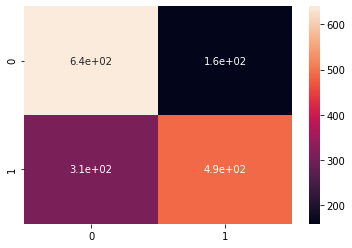

In [20]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73       799
         1.0       0.75      0.61      0.68       800

    accuracy                           0.71      1599
   macro avg       0.71      0.71      0.70      1599
weighted avg       0.71      0.71      0.70      1599



## Ensambel undersampling

In [22]:
len(df_class_1),len(df_class_0) ,len(df_class_1)/len(df_class_0)

(2665, 615, 4.333333333333333)

In [23]:
len_cls_0 = len(df_class_0)
df_1 = pd.concat([df_class_1[:len_cls_0],df_class_0])
df_2 = pd.concat([df_class_1[len_cls_0:2*len_cls_0],df_class_0])
df_3 = pd.concat([df_class_1[2*len_cls_0:3*len_cls_0],df_class_0])
df_4 = pd.concat([df_class_1[3*len_cls_0:4*len_cls_0],df_class_0])
df_5 = pd.concat([df_class_1[4*len_cls_0:5*len_cls_0],df_class_0])

In [24]:
X = df_1.drop("Liking",axis=1)
y = df_1['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_1 = SVC()
model_1.fit(X_train,y_train)
print(model_1.score(X_test,y_test))
model_1.fit(X,y)

0.7642276422764228


SVC()

In [25]:
X = df_2.drop("Liking",axis=1)
y = df_2['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_2 = SVC()
model_2.fit(X_train,y_train)
print(model_2.score(X_test,y_test))
model_2.fit(X,y)

0.7073170731707317


SVC()

In [26]:
X = df_3.drop("Liking",axis=1)
y = df_3['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_3 = SVC()
model_3.fit(X_train,y_train)
print(model_3.score(X_test,y_test))
model_3.fit(X,y)

0.5894308943089431


SVC()

In [27]:
X = df_4.drop("Liking",axis=1)
y = df_4['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_4 = SVC()
model_4.fit(X_train,y_train)
print(model_4.score(X_test,y_test))
model_4.fit(X,y)

0.6056910569105691


SVC()

In [28]:
X = df_5.drop("Liking",axis=1)
y = df_5['Liking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
model_5 = SVC()
model_5.fit(X_train,y_train)
print(model_5.score(X_test,y_test))
model_5.fit(X,y)

0.975609756097561


SVC()

In [29]:
def pred(x):
    y_pred = model_1.predict(x)+model_2.predict(x)+model_3.predict(x)+model_4.predict(x)+model_5.predict(x)
    return [1 if i>2 else 0 for i in y_pred]

<AxesSubplot:>

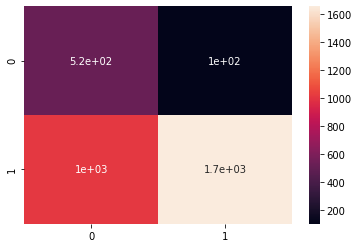

In [30]:
y_pred = pred(data)
sns.heatmap(confusion_matrix(target,y_pred),annot=True)

In [31]:
print(classification_report(target,y_pred))

              precision    recall  f1-score   support

         0.0       0.34      0.84      0.48       615
         1.0       0.94      0.62      0.75      2665

    accuracy                           0.66      3280
   macro avg       0.64      0.73      0.62      3280
weighted avg       0.83      0.66      0.70      3280



## SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(data,target)
y_sm.value_counts()

0.0    2665
1.0    2665
Name: Liking, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3,stratify=y_sm)

In [35]:
X_train.head()

,number_of_properties,submarket_name,building_class,year,period,completions,vac_pct,vacancy_chg_bps,asking_rent_pct_chg,abs_per_occ_stk_pct,...,office_employment,office_employment_pct_chg,industrial_employment,industrial_employment_pct_chg,households,households_pct_chg,population,population_pct_chg,household_avg_income,household_avg_income_pct_chg
2584,-0.144627,4,1,0.209596,0,1.883790,1.746843,1.998427,-1.049632,-0.526542,...,0.015520,-2.677462,-0.356347,-2.331039,0.131915,-0.557821,0.188623,0.479611,0.014555,-3.033381
5052,-0.808631,4,1,-1.506217,0,-0.133309,0.772315,-1.038592,2.537356,-0.005642,...,-1.492196,1.793648,-1.680154,1.182406,-1.392895,0.274682,-1.465289,1.131230,-1.399688,0.680677
1076,1.119122,3,0,-0.147719,0,-0.636673,-1.056477,-0.104365,0.472240,2.735939,...,-0.169534,0.951275,-0.513638,0.516722,-0.234803,2.154888,-0.228369,2.297991,-0.220397,0.848711
2671,-0.337403,1,1,-0.951678,0,-0.619861,-0.646235,-2.207157,0.366063,0.734585,...,-1.023821,0.364384,-0.709999,0.859453,-1.020948,-0.321656,-1.026831,0.081097,-0.977143,0.970691
1458,2.639906,4,1,0.477582,0,-0.687108,-0.577862,-1.155761,1.357049,-0.334632,...,0.426978,0.984443,0.913444,1.151038,0.386887,0.690557,0.476576,0.232617,0.654866,0.936226


In [36]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [37]:
model.score(X_test,y_test)

0.7248280175109444

<AxesSubplot:>

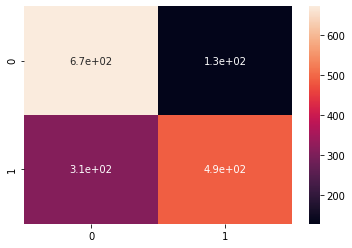

In [38]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.84      0.75       800
         1.0       0.79      0.61      0.69       799

    accuracy                           0.72      1599
   macro avg       0.74      0.72      0.72      1599
weighted avg       0.74      0.72      0.72      1599

